In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [7]:
scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [16]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,2.486568,0.627199
1,-1.501064,0.130737
2,1.810483,0.734790
3,0.066932,1.849615
4,-2.316784,0.405916


In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [17]:
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

<Axes: xlabel='A', ylabel='B'>

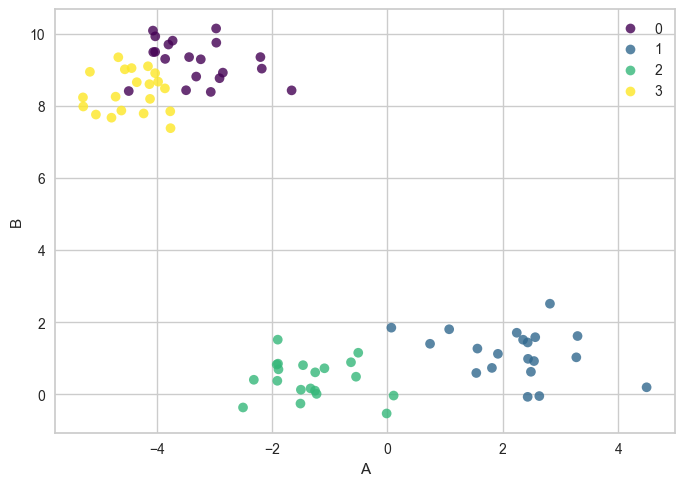

In [18]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)

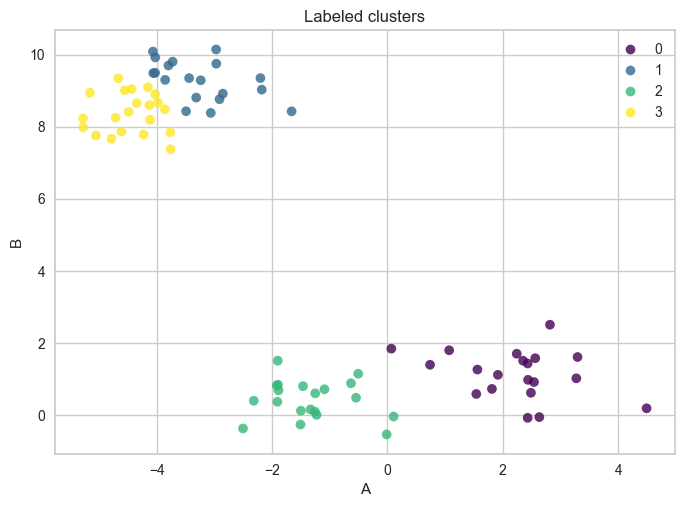

In [19]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

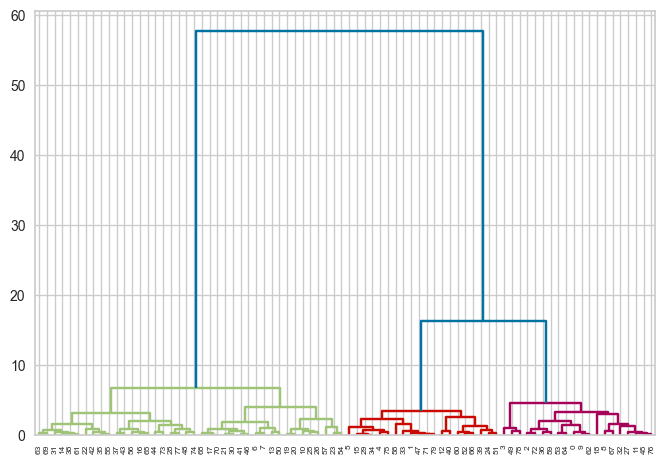

In [30]:
z = linkage(df, method='ward')
dendograma_dict = dendrogram(z, color_threshold=10)
plt.show()

In [29]:
fcluster(z, 4, criterion='maxclust')

array([4, 3, 4, 4, 3, 3, 2, 2, 4, 4, 2, 4, 3, 2, 1, 3, 1, 2, 4, 2, 2, 2,
       1, 2, 3, 2, 2, 4, 1, 3, 2, 1, 4, 3, 3, 1, 4, 1, 1, 3, 3, 2, 1, 1,
       1, 4, 2, 3, 1, 4, 2, 3, 3, 4, 2, 1, 1, 2, 3, 4, 3, 1, 4, 1, 4, 1,
       3, 4, 2, 1, 2, 3, 4, 1, 1, 3, 4, 1, 4, 3], dtype=int32)

In [39]:
@interact(method=['single', 'complete', 'centroid', 'ward'])
def dend(method):    
    z = linkage(df, method=method)
    dendograma_dict = dendrogram(z)
    plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

<Axes: ylabel='Count'>

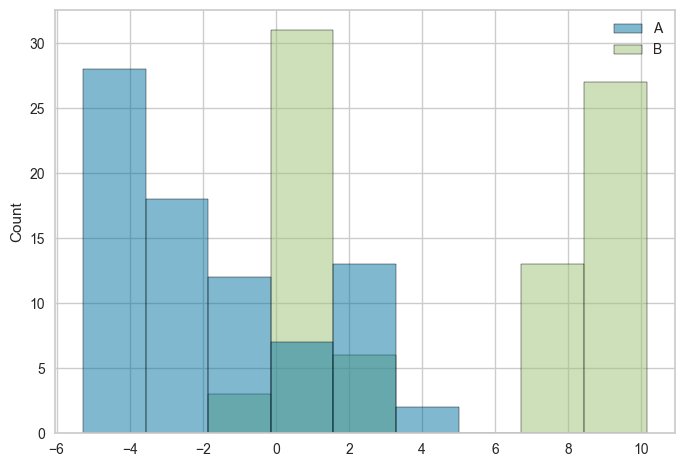

In [34]:
sns.histplot(df)

<Axes: >

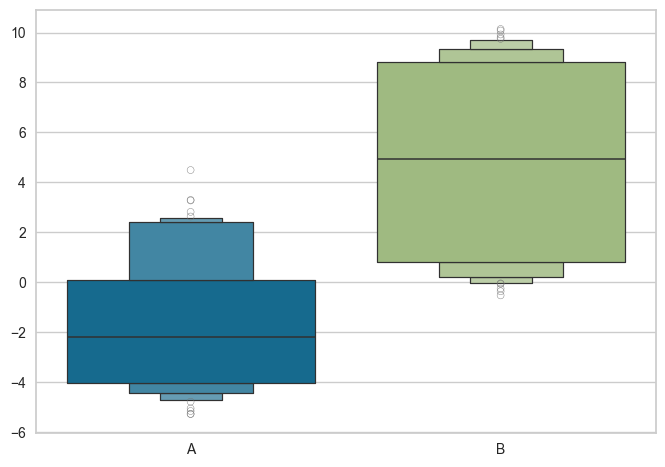

In [36]:
sns.boxenplot(df)

In [42]:
@interact(color_threshold=[2, 5, 10, 20])
def function(color_threshold):
    z = linkage(df, method='ward')
    dendograma_dict = dendrogram(z, color_threshold=color_threshold)
    plt.show()

interactive(children=(Dropdown(description='color_threshold', options=(2, 5, 10, 20), value=2), Output()), _do…